In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('HR_comma.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [6]:
pd.crosstab(df['salary'], df['left'])
pd.crosstab(df['Department'], df['left'])


left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [28]:
salary_retention = pd.crosstab(df['salary'], df['left'], normalize='index')
salary_retention

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


<Axes: xlabel='salary'>

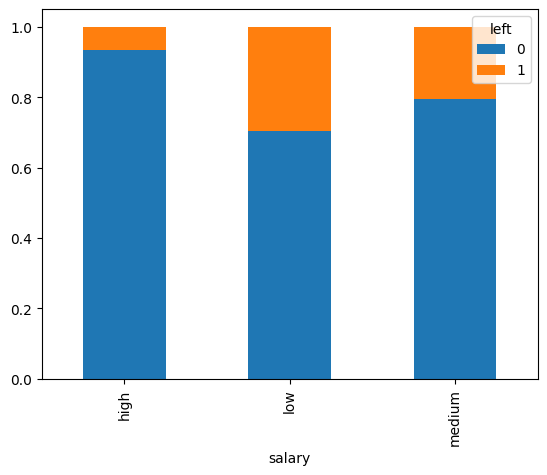

In [31]:
salary_retention.plot(kind='bar', stacked=True)


In [37]:
department_retention = pd.crosstab(df['Department'], df['left'], normalize='index')
department_retention

left,0,1
Department,,
IT,0.777506,0.222494
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934
management,0.855556,0.144444
marketing,0.763403,0.236597
product_mng,0.780488,0.219512
sales,0.755072,0.244928
support,0.751009,0.248991


<Axes: xlabel='Department'>

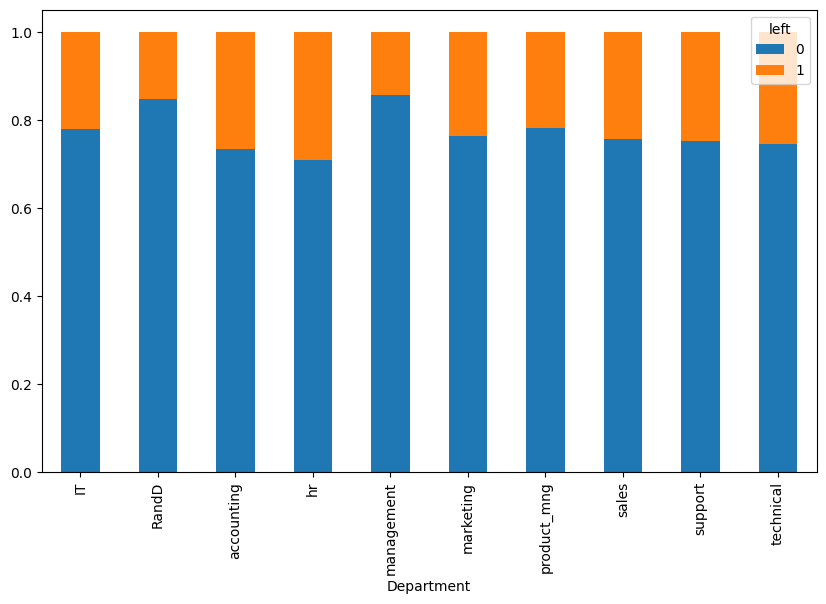

In [39]:
department_retention.plot(kind='bar',  stacked=True, figsize=(10,6))

In [172]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 
 'average_montly_hours', 'time_spend_company', 
 'Work_accident', 'promotion_last_5years', 'salary','Department']]


In [173]:
y = df['left']


In [174]:
#here we change the salary and department in binary 
df_dummies = pd.get_dummies(X[['salary', 'Department']], drop_first=True,  dtype=int)


In [177]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [178]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\jurge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [182]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8


In [183]:
len(y_pred)

3000